# 导入所需库

In [75]:
# 数据处理
import pandas as pd
import numpy as np

# 数据可视化
from pyecharts import options as opts
from pyecharts.charts import Pie,Bar,Line
from matplotlib import pyplot as plt
import seaborn as sns 

# 数据预处理
from sklearn.preprocessing import LabelEncoder, StandardScaler

#建模
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# 模型评估
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve,make_scorer
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

# 数据读取与观察

In [76]:
data = pd.read_excel(".\员工离职数据.xlsx")
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sale,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [77]:
data.shape

(14999, 10)

In [78]:
data.iloc[:,:2]

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sale                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [80]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [81]:
for item in data.columns:
    print(f'{item}列有{data[item].nunique()}个不同取值')
    print(f'{item}列统计信息：\n')
    print(data[item].value_counts())
    print('*' * 60)                                           # 输出每列特征数据的不同取值个数以及每个数值的统计情况


satisfaction_level列有92个不同取值
satisfaction_level列统计信息：

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: count, Length: 92, dtype: int64
************************************************************
last_evaluation列有65个不同取值
last_evaluation列统计信息：

last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: count, Length: 65, dtype: int64
************************************************************
number_project列有6个不同取值
number_project列统计信息：

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64
************************************************************
average_montly_hours列有215个不同取值
average_montly_hours列统计信息：

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303 

根据对数据的观察，对每个字段进行翻译: 

| 字段                                   | 字段翻译     | 数据类型                           |
|--------------------------------------|----------|--------------------------------|
| satisfaction_level                   | 满意度      | float64                        |
| last_evaluation                      | 上次绩效评估分数 | float64                        |
| number_project                       | 项目数      | int64                          |
| average_montly_hours                 | 月平均工作小时数 | int64                          |
| time_spend_company                   | 在公司工作年限  | int64                          |
| Work_accident                        | 是否发生工作事故 | int64                          |
| promotion_last_5years                | 最近五年升职   | int64                          |
| sale                                 | 所属部门     | object                         |
| salary                               | 薪资水平     | object                         |
| left                                 | 是否离职     | int64                          |

将各字段的不同值的统计结果整理于下：

| 字段名称              | 字段描述              | 不同值个数 |
|-----------------------|-------------------|------------|
| satisfaction_level    | 满意度               | 92         |
| last_evaluation       | 上次绩效评估分数          | 65         |
| number_project        | 项目数               | 6          |
| average_montly_hours  | 月平均工作时长           | 215        |
| time_spend_company    | 在公司的工作年限          | 8          |
| Work_accident         | 是否发生工作事故（0：否，1：是） | 2          |
| left                  | 是否已离职（0：否，1：是）    | 2          |
| promotion_last_5years | 最近五年升职（0：否，1：是）   | 2          |
| sale                  | 所属部门              | 10         |
| salary                | 薪资水平（low、medium、high）       | 3          |


标签字段为left

# 数据预处理

## 数据类型转换   

sale(所属部门)与salary(薪资水平)为字符型数据，根据不同值统计结果:
>- sale不同值数较多，选择采用标签编码。
> - salary分类为low、medium、high为有序的类别数据，选择采用标签编码

In [82]:
# 实例化标签编码类
label_encoder = LabelEncoder()

data_change = data.copy()
data_change['sale'] = label_encoder.fit_transform(data_change['sale'])
data_change['salary'] = label_encoder.fit_transform(data_change['salary'])
data_change

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sale,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [83]:
# 转换完成
data_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sale                   14999 non-null  int32  
 9   salary                 14999 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


## 缺失值处理

In [84]:
# 查看缺失值
data_change.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sale                     0
salary                   0
dtype: int64

未发现缺失值，不对其进行缺失值处理

## 重复值处理

In [85]:
# 检查重复值
duplicate_rows = data_change[data_change.duplicated()]
# 查看重复值数量
data_change.duplicated().sum()

3008

In [86]:
duplicate_rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sale,salary
396,0.46,0.57,2,139,3,0,1,0,7,1
866,0.41,0.46,2,128,3,0,1,0,2,1
1317,0.37,0.51,2,127,3,0,1,0,7,2
1368,0.41,0.52,2,132,3,0,1,0,1,1
1461,0.42,0.53,2,142,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


由于员工离职数据集数据总数为14999，其中包括重复数据3008条，重复数据占比较大，认为超出正常偶然情况，将其进行删除

In [87]:
# 删除重复值
data_change = data_change.drop_duplicates()
data_change.shape

(11991, 10)

# 探索性数据分析

## 描述性分析


In [14]:
data_change.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0
sale,11991.0,5.871153,2.899022,0.00,4.00,7.00,8.00,9.0
salary,11991.0,1.356184,0.628071,0.00,1.00,1.00,2.00,2.0


In [15]:
data_count = data_change['left'].value_counts()
data_count

left
0    10000
1     1991
Name: count, dtype: int64

### 1. 标签数据可视化

In [16]:
# 获取数据
data_x = data_count.keys().tolist()
# 替换
data_x = ['已离职' if x == 1 else '未离职' for x in data_x]
data_y = data_count.values.tolist()
data_pie = [*zip(data_x, data_y)]

# 绘制饼图
c = (
    Pie()
    .add(series_name="left",data_pair=data_pie)
    .set_global_opts(title_opts=opts.TitleOpts(title="离职与未离职占比饼图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter = "{b}: {c} ({d}%)"))
    .render("离职与未离职占比饼图.html")
)

经过初步数据预处理后，数据集大小为11991条，其中已离职为1991条，占16.6%；为离职为10000，占83.4%

### 2.1 满意度与是否离职的关系

满意度是连续性变量，选择绘制直方图

In [282]:
# 获取数据
satisfaction_data = pd.crosstab(data_change['satisfaction_level'], data_change['left'])
satisfaction_data.columns = ['未离职', '已离职']
satisfaction_data.reset_index(inplace=True)
# 设置分箱宽度
bin_width = 0.1
bins = np.arange(0, 1.1, bin_width)  # 分成 0 到 1 之间的箱子

# 使用 pandas 的 cut 函数将数据分箱
satisfaction_data['satisfaction_bins'] = pd.cut(satisfaction_data['satisfaction_level'], bins)

# 按照分箱后的满意度计算人数
hist_data = satisfaction_data.groupby('satisfaction_bins').agg({'未离职': 'sum', '已离职': 'sum'}).reset_index()

# 提取直方图的横坐标（取每个箱子的中心点）
x_data = [round((bins[i] + bins[i+1]) / 2, 2) for i in range(len(bins) - 1)]
# 绘制直方图
bar = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis('未离职', hist_data['未离职'].tolist(), stack='stack1')
    .add_yaxis('已离职', hist_data['已离职'].tolist(), stack='stack1')
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="满意度与是否离职的关系直方图"),
        xaxis_opts=opts.AxisOpts(name='满意度'),
        yaxis_opts=opts.AxisOpts(name='人数'),
        legend_opts=opts.LegendOpts(is_show=True),
        tooltip_opts=opts.TooltipOpts(formatter="{a}<br/>{b} : {c}")
    )
    .render('满意度与是否离职的关系直方图.html')
)


- 离职率在员工满意度较低时较高，在满意度中心点取值为0.05时离职率达100%
- 离职率在员工满意度升高时，不断提高，在满意度中心点取值为0.75时，较满意度中心点取值为0.65的离职率1.5%提升至13.1%

### 2.2 上次绩效评分与是否离职的关系

由于绩效评分为连续数据，选择绘制直方图

In [284]:
# 获取数据
evaluation_data = pd.crosstab(data_change['last_evaluation'], data_change['left'])
evaluation_data.columns = ['未离职', '已离职']
evaluation_data.reset_index(inplace=True)
# 设置分箱宽度
bin_width = 0.05
bins = np.arange(0.5, 1.05, bin_width)  # 观察数据，最小评分数为0.5 分成 0.5 到 1 之间的箱子

# 使用 pandas 的 cut 函数将数据分箱
evaluation_data['evaluation_bins'] = pd.cut(evaluation_data['last_evaluation'], bins)

# 按照分箱后的满意度计算人数
hist_data = evaluation_data.groupby('evaluation_bins').agg({'未离职': 'sum', '已离职': 'sum'}).reset_index()

# 提取直方图的横坐标（取每个箱子的中心点）
x_data = [round((bins[i] + bins[i+1]) / 2, 2) for i in range(len(bins) - 1)]

# 绘制直方图
bar = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis('未离职', hist_data['未离职'].tolist(), stack='stack1',z=0)
    .add_yaxis('已离职', hist_data['已离职'].tolist(), stack='stack1',z=0)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            splitline_opts=opts.SplitLineOpts(  
            # 显示分割线
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)  # 图形透明度。支持从0到1的数字，为0时不绘图。
            ))
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="上次绩效评分与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

# 计算每个项目数对应的离职率
leave_rate = hist_data['已离职']/(hist_data['已离职'] + hist_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold'),
               linestyle_opts=opts.LineStyleOpts(width=3)  
               )
)
bar.overlap(line)
bar.render('上次绩效评分与是否离职的关系组合图.html')



'D:\\python\\school\\2_刘自闲_员工离职数据集\\上次绩效评分与是否离职的关系组合图.html'

根据直方图显示，离职率随上次绩效评分的逐渐增高呈先降低后升高的趋势
- 上次绩效评分中心点取值为0.52时离职率为26.0%
- 在上次绩效评分中心点取值为0.68时达到最低1%
- 后逐渐增高，在上次绩效评分中心点取值为0.98时离职率为24%

### 2.3 项目数与是否离职的关系

In [285]:
# 创建交叉表
number_project_data = pd.crosstab(data_change['number_project'], data_change['left'])
number_project_data.columns = ['未离职', '已离职']
number_project_data.reset_index(inplace=True)

# 构建数据
list_number_project = number_project_data['number_project'].tolist()
list_not_left = number_project_data['未离职'].tolist()
list_left = number_project_data['已离职'].tolist()
# 绘制柱状图
bar = (
    Bar()
    .add_xaxis(list_number_project)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1',z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="项目数与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
    
)

# 计算每个项目数对应的离职率
leave_rate = number_project_data['已离职']/(number_project_data['已离职'] + number_project_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('项目数与是否离职的关系组合图.html')


'D:\\python\\school\\2_刘自闲_员工离职数据集\\项目数与是否离职的关系组合图.html'

根据离职率折线图显示，离职率随项目数逐渐增高呈现先降低后上升的趋势
- 在完成项目数为2时，离职率为54%
- 在完成项目数为3时，离职率达最低为1%
- 后逐渐上升，在完成项目数为7时，离职率达最高为100%

### 2.4 月平均工作小时数与是否离职的关系

In [286]:
# 获取数据
montly_hours_data = pd.crosstab(data_change['average_montly_hours'], data_change['left'])
montly_hours_data.columns = ['未离职', '已离职']
montly_hours_data.reset_index(inplace=True)
# 设置分箱宽度
bin_width = 20
bins = np.arange(80, 330, bin_width)  # 分成 95 到 330 之间的箱子

# 使用 pandas 的 cut 函数将数据分箱
montly_hours_data['average_montly_hours'] = pd.cut(montly_hours_data['average_montly_hours'], bins)

# 按照分箱后的满意度计算人数
hist_data = montly_hours_data.groupby('average_montly_hours').agg({'未离职': 'sum', '已离职': 'sum'}).reset_index()

# 提取直方图的横坐标（取每个箱子的中心点）
x_data = [round((bins[i] + bins[i+1]) / 2, 2) for i in range(len(bins) - 1)]
# 绘制直方图
bar = (
    Bar()
    .add_xaxis(x_data)
    .add_yaxis('未离职', hist_data['未离职'].tolist(), stack='stack1',z=0)
    .add_yaxis('已离职', hist_data['已离职'].tolist(), stack='stack1',z=0)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            splitline_opts=opts.SplitLineOpts(  
            # 显示分割线
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)  # 图形透明度。支持从0到1的数字，为0时不绘图。
            ))
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="月平均工作小时数与是否离职的关系直方图"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

# 计算每个项目数对应的离职率
leave_rate = hist_data['已离职']/(hist_data['已离职'] + hist_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold'),
               linestyle_opts=opts.LineStyleOpts(width=3)  
               )
)
bar.overlap(line)
bar.render('月平均工作小时数与是否离职的关系组合图.html')


'D:\\python\\school\\2_刘自闲_员工离职数据集\\月平均工作小时数与是否离职的关系组合图.html'

根据图中折线显示，离职率随月平均工作小时增加而上升
- 月平均工作小时越高，离职率越高
- 月平均工作小时在300-320的员工，离职率高达100%

### 2.5 在公司工作年限与是否离职的关系

In [287]:
# 创建交叉表
spend_company_data = pd.crosstab(data_change['time_spend_company'], data_change['left'])
spend_company_data.columns = ['未离职', '已离职']
spend_company_data.reset_index(inplace=True)

# 构建数据
list_spend_company = spend_company_data['time_spend_company'].tolist()
list_not_left = spend_company_data['未离职'].tolist()
list_left = spend_company_data['已离职'].tolist()
# 绘制柱状图
bar = (
    Bar()
    .add_xaxis(list_spend_company)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1',z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="在公司工作年限与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
    
)

# 计算每个项目数对应的离职率
leave_rate = spend_company_data['已离职']/(spend_company_data['已离职'] + spend_company_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('在公司工作年限与是否离职的关系组合图.html')


'D:\\python\\school\\2_刘自闲_员工离职数据集\\在公司工作年限与是否离职的关系组合图.html'

根据图内折线图显示，随在公司工作年限的增加，离职率呈现先上升后下降的趋势
- 在公司工作年限为2年时，离职率为1%
- 在公司工作年限为5年时，离职率最高达45%
- 后随工作年限增加离职率下降，在公司工作年限为7年时，离职率降低为0%

### 2.6 是否发生工作事故与是否离职的关系

In [288]:
# 创建交叉表
work_accident_data = pd.crosstab(data_change['Work_accident'], data_change['left'])
work_accident_data.columns = ['未离职', '已离职']
work_accident_data.reset_index(inplace=True)

# 构建数据
list_work_accident = work_accident_data['Work_accident'].tolist()
list_work_accident = ['发生过工作事故' if i == 1 else '未发生过工作事故' for i in list_work_accident]
list_not_left = work_accident_data['未离职'].tolist()
list_left = work_accident_data['已离职'].tolist()

bar = (
    Bar()
    .add_xaxis(list_work_accident)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1', z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="是否发生过工作事故和是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

leave_rate = work_accident_data['已离职']/(work_accident_data['已离职'] + work_accident_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('是否发生过工作事故和是否离职的关系组合图.html')

'D:\\python\\school\\2_刘自闲_员工离职数据集\\是否发生过工作事故和是否离职的关系组合图.html'

发生过工作事故的离职率为6%，未发生工作事故的离职率为19%
- 未发生过工作事故比发生过工作事故的离职率稍高一点，差别较小
- 认为是否发生过工作事故对离职率的影响较小

### 2.7 最近五年升职与是否离职的关系

In [289]:
# 创建交叉表
promotion_data = pd.crosstab(data_change['promotion_last_5years'], data_change['left'])
promotion_data.columns = ['未离职', '已离职']
promotion_data.reset_index(inplace=True)

# 构建数据
list_promotion = promotion_data['promotion_last_5years'].tolist()
list_promotion = ['5年内升职' if i == 1 else '5年内未升职' for i in list_promotion]
list_not_left = promotion_data['未离职'].tolist()
list_left = promotion_data['已离职'].tolist()

bar = (
    Bar()
    .add_xaxis(list_promotion)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1', z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="5年内升职与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

leave_rate = promotion_data['已离职']/(promotion_data['已离职'] + promotion_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('5年内升职与是否离职的关系组合图.html')

'D:\\python\\school\\2_刘自闲_员工离职数据集\\5年内升职与是否离职的关系组合图.html'

依据百分比折线图可得，5年有升职的离职率为4%,5年内未升职的离职率为17%
- 5年有升职的离职率比5年内为升职的离职率较低一点，差别较小
- 认为5年内是否有升职对离职率的影响较小

### 2.8 所属部门与是否离职的关系

In [290]:
# 创建交叉表
sale_data = pd.crosstab(data_change['sale'], data_change['left'])
sale_data.columns = ['未离职', '已离职']
sale_data.reset_index(inplace=True)

# 构建数据
list_sale = sale_data['sale'].tolist()
list_not_left = sale_data['未离职'].tolist()
list_left = sale_data['已离职'].tolist()

bar = (
    Bar()
    .add_xaxis(list_sale)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1', z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="所属部门与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

leave_rate = sale_data['已离职']/(sale_data['已离职'] + sale_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('所属部门与是否离职的关系组合图.html')

'D:\\python\\school\\2_刘自闲_员工离职数据集\\所属部门与是否离职的关系组合图.html'

观察离职率折线图可得，不同所属部门的离职率有较小波动，波动范围在12%-19%之间
- 认为不同所属部门与离职率无较大关系

### 2.9 薪资水平与是否离职的关系

In [295]:
for i, class_label in enumerate(label_encoder.classes_):
    print(f"Class {i}: {class_label}")

Class 0: high
Class 1: low
Class 2: medium


In [297]:
# 创建交叉表
salary_data = pd.crosstab(data_change['salary'], data_change['left'])
salary_data.columns = ['未离职', '已离职']
salary_data.reset_index(inplace=True)

# 构建数据
list_salary = salary_data['salary'].tolist()
# 提高数据可读性
tmp = []
for i in list_salary:
    if i == 0:
        tmp.append('high')
    elif i == 1:
        tmp.append('low')
    elif i == 2:
        tmp.append('medium')
list_salary = tmp
list_not_left = salary_data['未离职'].tolist()
list_left = salary_data['已离职'].tolist()

bar = (
    Bar()
    .add_xaxis(list_salary)
    .add_yaxis(series_name='未离职', y_axis=list_not_left,yaxis_index=0, stack='stack1', z=0)
    .add_yaxis(series_name ='已离职',y_axis=list_left, yaxis_index=0, stack='stack1', z=0)
    .extend_axis(
        yaxis=opts.AxisOpts(
            # 设置y轴属性
            type_="value",  
            # 给y轴设置名称
            name="离职率(%)",  
            # 轴名称位于中间
            name_location="center",  
            # 轴名称与轴线距离30px
            name_gap=30,  
            )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name='人数',
            name_location="center",  # 设置名称位置
            name_gap=60,  # 设置轴名称与轴线之间的距离
        ),
        title_opts=opts.TitleOpts(title="薪资水平与是否离职的关系"),
        # 图例设置
        legend_opts=opts.LegendOpts(pos_left='40%', pos_bottom='89%'),
        # 设置提示框和指示器
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross")
    )
)

leave_rate = salary_data['已离职']/(salary_data['已离职'] + salary_data['未离职'])
leave_rate = round(leave_rate, 2)
# 提取项目数和离职率
leave_rate = leave_rate.tolist()
# 创建折线图
line = (
    Line()
    .add_xaxis(list(range(0, len(leave_rate), 1)))
    .add_yaxis(series_name="离职率(%)", 
               y_axis=leave_rate, 
               yaxis_index=1,         
               label_opts=opts.LabelOpts(is_show=False, font_size=10, font_weight='bold')
               )
)
bar.overlap(line)
bar.render('薪资水平与是否离职的关系组合图.html')

'D:\\python\\school\\2_刘自闲_员工离职数据集\\薪资水平与是否离职的关系组合图.html'

根据图表可得，离职率随薪资水平的升高而降低
- 薪资水平低时，离职率为20%
- 薪资水平高时，离职率为5%
- 离职率浮动较小，认为薪资水平对离职率影响较小

### 2.10 各特征与离职的相关性

In [88]:
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号

In [89]:
data_change

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sale,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


进行归一化

In [90]:
scaler = StandardScaler()
# 选择数值类型进行归一化
columns_to_scale = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                    'time_spend_company']
all_data = data_change.copy()

scaler_data = scaler.fit_transform(data_change[columns_to_scale])
scaled_df = pd.DataFrame(scaler_data, columns=columns_to_scale)
# 还原数据
all_data[columns_to_scale] = scaled_df
all_data.isna().sum()


satisfaction_level       9
last_evaluation          9
number_project           9
average_montly_hours     9
time_spend_company       9
Work_accident            0
left                     0
promotion_last_5years    0
sale                     0
salary                   0
dtype: int64

查看缺失值发现出现缺失值，可能是数据在进行归一化时出现极端值导致归一化引发了数据的问题，对缺失数据进行均值填充处理

In [91]:
all_data = all_data.fillna(all_data.mean())
all_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sale                     0
salary                   0
dtype: int64

绘制相关系数热力图

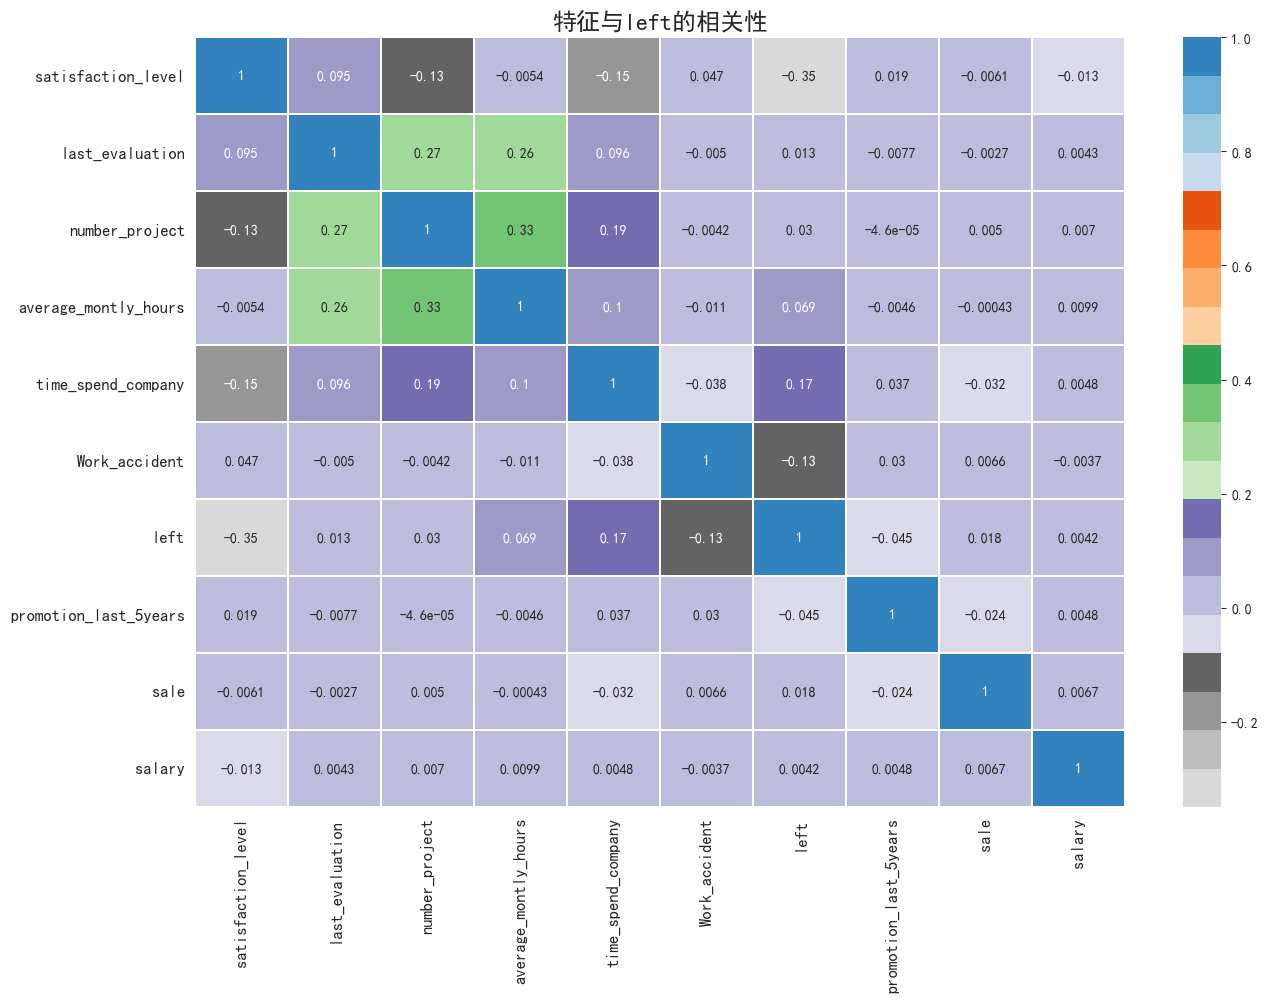

In [92]:
corr = all_data.corr()
plt.figure(figsize=(15, 10))  
sns.heatmap(corr, linewidths=0.1, cmap='tab20c_r', annot=True)
plt.title('特征与left的相关性', fontdict={'fontsize': 'xx-large', 'fontweight':'heavy'}) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 

绘制相关系数柱状图

<Axes: >

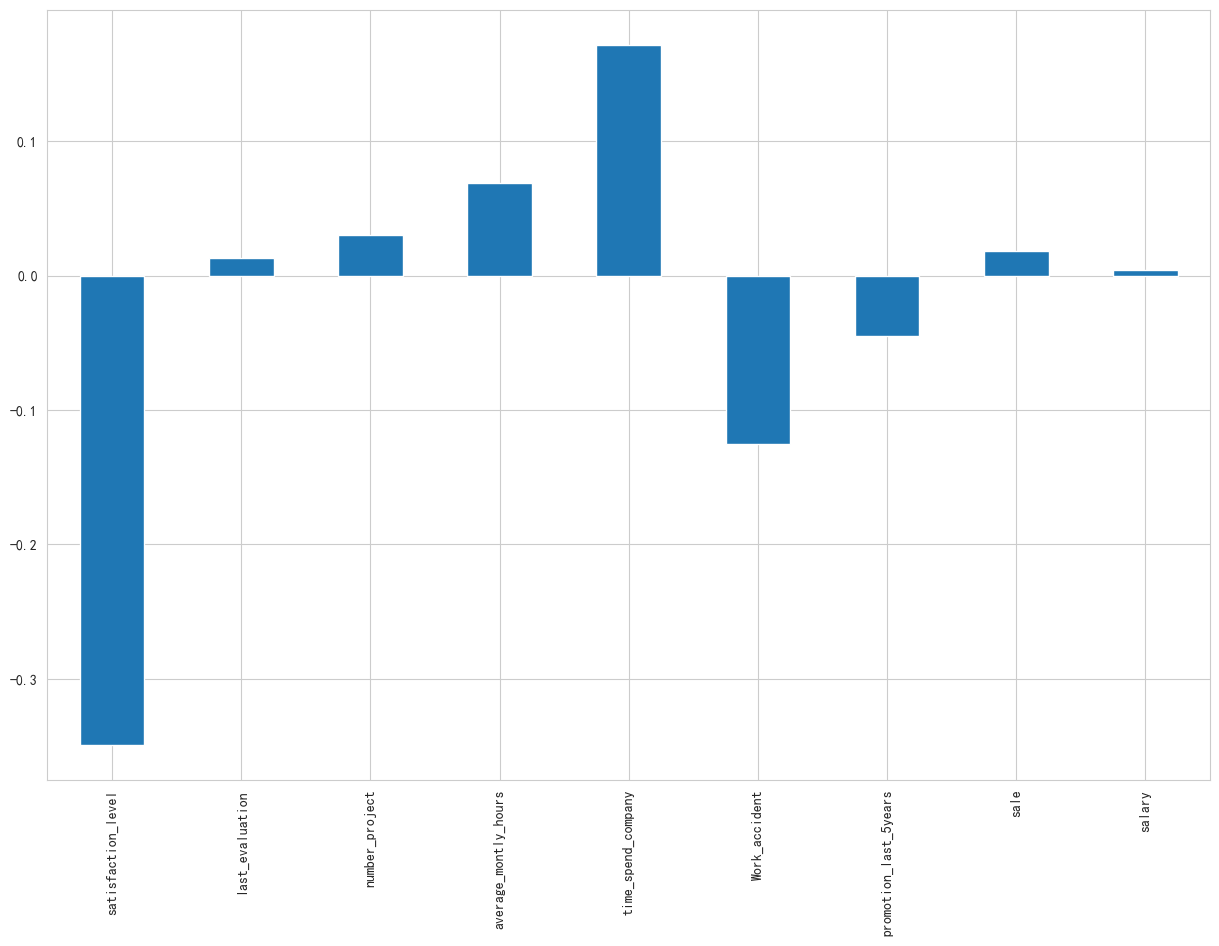

In [93]:
plt.figure(figsize=(15,10))
corr_bar_data = corr['left'].copy()
corr_bar_data = corr_bar_data.drop('left')
corr_bar_data.plot.bar()

In [94]:
corr_bar_data.apply(lambda x: np.abs(x)).sort_values()

salary                   0.004224
last_evaluation          0.013436
sale                     0.018286
number_project           0.030342
promotion_last_5years    0.044657
average_montly_hours     0.068947
Work_accident            0.125436
time_spend_company       0.171855
satisfaction_level       0.349109
Name: left, dtype: float64

通过上述图片展示与数据可得
- 薪资水平（salary）对是否离职（left）的影响较小，相关系数最低为0.004224
- 满意度（satisfaction_level）对是否离职（left）的影响最大，相关系数最高为0.35
- 根据相关系数，去除对是否离职（left）影响较小的特征，即salary

In [95]:
all_data = all_data.drop('salary', axis=1)
all_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sale
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,0,1,0,7
1,0.706637,0.851380,1.029194,1.262709,1.981036,0,1,0,7
2,-2.155721,0.970190,2.748604,1.467939,0.477485,0,1,0,7
3,0.374770,0.910785,1.029194,0.462311,1.229261,0,1,0,7
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,0,1,0,7
...,...,...,...,...,...,...,...,...,...
11995,0.000868,-0.000069,-0.000343,-0.000495,-0.000421,1,0,1,4
11996,0.000868,-0.000069,-0.000343,-0.000495,-0.000421,0,0,1,4
11997,0.000868,-0.000069,-0.000343,-0.000495,-0.000421,0,0,1,4
11998,0.000868,-0.000069,-0.000343,-0.000495,-0.000421,0,0,1,5


## 建模数据分析

### 模型建立和评估

划分数据集、验证集

In [96]:
X = all_data.drop('left', axis=1)
y = all_data['left']

建立一系列基准化模型

In [104]:
# 逻辑回归
logit = LogisticRegression()
# k近邻
knn = KNeighborsClassifier()
# 支持向量积
svc = SVC(kernel='linear', random_state=42)
# 随机森林
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# 决策树
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)

使用交叉验证进行模型评价

In [105]:
cv = KFold(n_splits=5,shuffle=True,random_state=42)  # 实例化交叉验证模式

def eval_model(model, x, y, cv, name):
    cross_result = cross_validate(model,
                                  x, y,
                                  cv=cv,
                                  return_train_score=True,
                                  verbose=True
                                  )
    
    # 计算均方根误差
    trainRMSE = np.sqrt(abs(cross_result['train_score']))
    testRMSE = np.sqrt(abs(cross_result['test_score']))
    
    # 存储数据
    df = pd.DataFrame({'Model': name,
                       'trainRMSE': trainRMSE,
                       'testRMSE': testRMSE
    })
    return df


In [106]:
logit_result = eval_model(logit, X, y, cv, 'logit' )
knn_result = eval_model(knn, X, y, cv, 'knn' )
svc_result = eval_model(svc, X, y, cv, 'svc' )
rfc_result = eval_model(rfc, X, y, cv, 'rfc' )
decision_tree_result = eval_model(decision_tree, X, y, cv, 'decision_tree' )

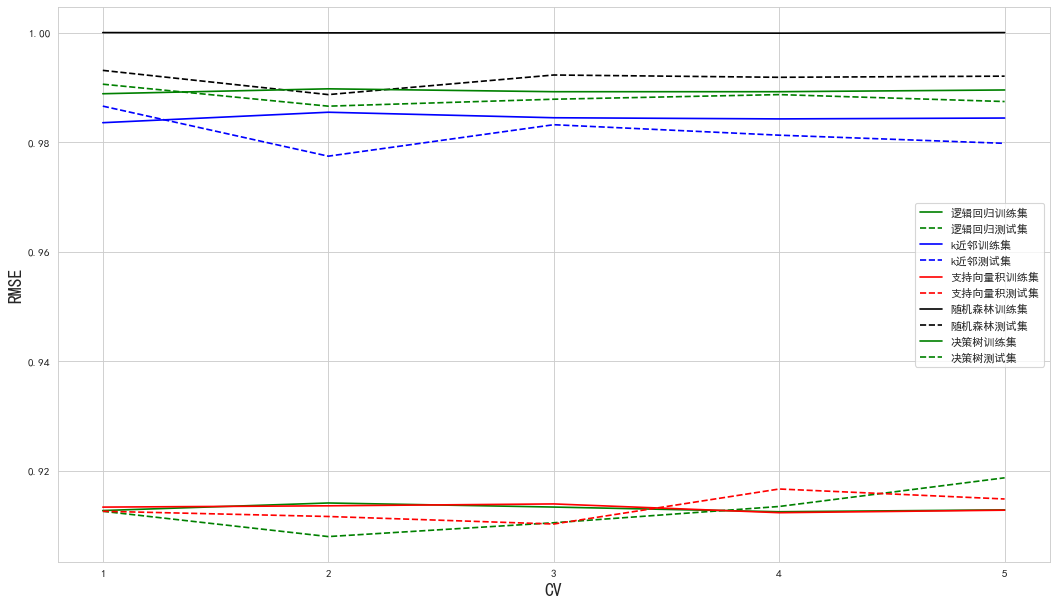

In [107]:
# 显示模型结果
plt.figure(figsize=(16,9),dpi=80)
xaxis = range(1,6)

#RMSE
plt.plot(xaxis,logit_result['trainRMSE'],color="green",label = "逻辑回归训练集")
plt.plot(xaxis,logit_result['testRMSE'],color="green",linestyle="--",label = "逻辑回归测试集")
plt.plot(xaxis,knn_result['trainRMSE'],color="blue",label = "k近邻训练集")
plt.plot(xaxis,knn_result['testRMSE'],color="blue",linestyle="--",label = "k近邻测试集")
plt.plot(xaxis,svc_result['trainRMSE'],color="red",label = "支持向量积训练集")
plt.plot(xaxis,svc_result['testRMSE'],color="red",linestyle="--",label = "支持向量积测试集")
plt.plot(xaxis,rfc_result['trainRMSE'],color="black",label = "随机森林训练集")
plt.plot(xaxis,rfc_result['testRMSE'],color="black",linestyle="--",label = "随机森林测试集")
plt.plot(xaxis,decision_tree_result['trainRMSE'],color="green",label = "决策树训练集")
plt.plot(xaxis,decision_tree_result['testRMSE'],color="green",linestyle="--",label = "决策树测试集")
plt.xticks([1,2,3,4,5])
plt.xlabel("CV",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()


In [108]:
all_results = pd.concat([logit_result, knn_result, svc_result, rfc_result, decision_tree_result], ignore_index=True)
all_results

,Model,trainRMSE,testRMSE
0,logit,0.912738,0.912605
1,logit,0.914117,0.907985
2,logit,0.913375,0.910508
3,logit,0.912519,0.913480
4,logit,0.912861,0.918715
5,knn,0.983549,0.986571
6,knn,0.985457,0.977435
7,knn,0.984451,0.983178
8,knn,0.984239,0.981267
9,knn,0.984398,0.979779


依据上图可知，数据集使用随机森林进行建模时效果较好，选择使用使用随机森林作为使用模型

### 随机森林参数调优

在进行基础模型建立时，随机森林的n_estimators为100，且在上述交叉验证时未出现较明显的过拟合现象，现对随机森林的参数进行调优

使用贝叶斯优化

In [97]:
def hyperopt_objective(params):
    
    #定义评估器
    #需要搜索的参数需要从输入的字典中索引出来
    #不需要搜索的参数，可以是设置好的某个值
    #在需要整数的参数前调整参数类型
    reg = RandomForestClassifier(n_estimators = int(params["n_estimators"])
                                  ,max_depth = int(params["max_depth"])
                                  ,max_features = int(params["max_features"])
                                  ,min_impurity_decrease = params["min_impurity_decrease"]
                                  ,random_state=1412
                                  ,verbose=False
                                  ,n_jobs=-1)
    
    #交叉验证结果，输出负根均方误差（-RMSE）
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    validation_loss = cross_validate(reg,X,y
                                     ,scoring="neg_root_mean_squared_error"
                                     ,cv=cv
                                     ,verbose=False
                                     ,n_jobs=-1
                                     ,error_score='raise'
                                    )
    
    #最终输出结果，由于只能取最小值，所以必须对（-RMSE）求绝对值
    #以求解最小RMSE所对应的参数组合
    return np.mean(abs(validation_loss["test_score"]))


In [147]:
# 定义参数空间
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",80,100,1)
                     , 'max_depth': hp.quniform("max_depth",10,25,1)
                     , "max_features": hp.quniform("max_features",10,20,1)
                     , "min_impurity_decrease":hp.quniform("min_impurity_decrease",0,5,1)
                    }


In [148]:
def param_hyperopt(max_evals=100):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(300)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials


In [149]:
params_best, trials = param_hyperopt(50) 


100%|██████████| 50/50 [00:16<00:00,  2.96trial/s, best loss: 0.1308313300761746] 

 
 best params:  {'max_depth': 24.0, 'max_features': 17.0, 'min_impurity_decrease': 0.0, 'n_estimators': 86.0} 



In [150]:
params_best, trials = param_hyperopt(100) 

100%|██████████| 100/100 [00:35<00:00,  2.81trial/s, best loss: 0.12891764897526056]

 
 best params:  {'max_depth': 10.0, 'max_features': 15.0, 'min_impurity_decrease': 0.0, 'n_estimators': 95.0} 



进行调优之前的交叉验证结果

In [151]:
rfc_result

,Model,trainRMSE,testRMSE
0,rfc,1.000000,0.993098
1,rfc,0.999948,0.988677
2,rfc,0.999948,0.992255
3,rfc,0.999896,0.991835
4,rfc,1.000000,0.992045


In [152]:
# 模型调优
rfc_turn1 = RandomForestClassifier(n_estimators=80, random_state=42, max_depth=21, max_features=20,min_impurity_decrease=0.0)

result1 = eval_model(rfc_turn1, X, y, cv, 'random_forest_turn')


rfc_turn2 = RandomForestClassifier(n_estimators=87, random_state=42, max_depth=10, max_features=10,min_impurity_decrease=0.0)
result2 = eval_model(rfc_turn2, X, y, cv, 'random_forest_turn')


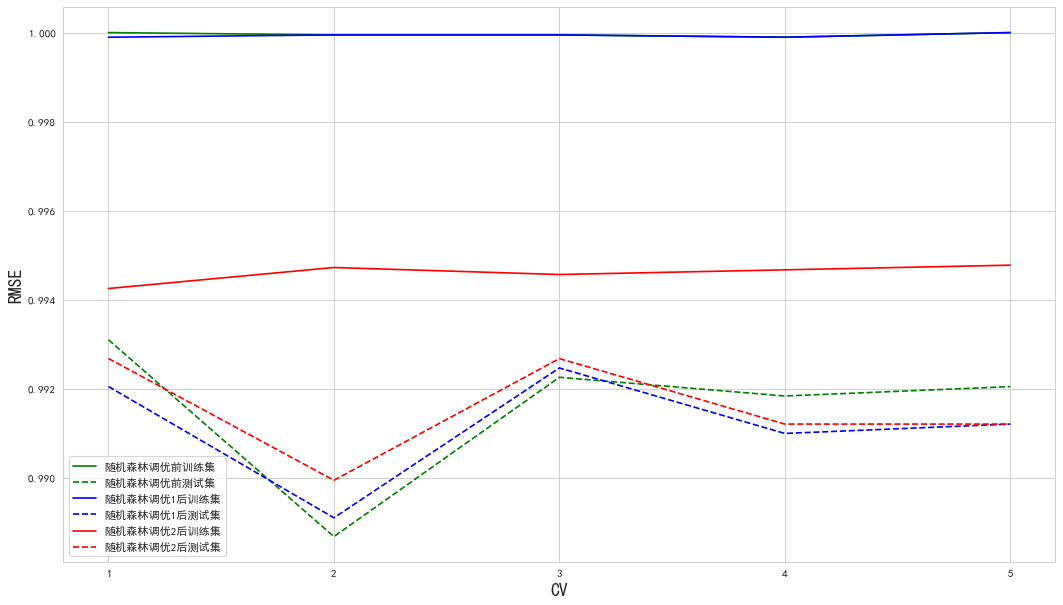

In [153]:
# 显示模型结果
plt.figure(figsize=(16,9),dpi=80)
xaxis = range(1,6)

#RMSE
plt.plot(xaxis,rfc_result['trainRMSE'],color="green",label = "随机森林调优前训练集")
plt.plot(xaxis,rfc_result['testRMSE'],color="green",linestyle="--",label = "随机森林调优前测试集")
plt.plot(xaxis,result1['trainRMSE'],color="blue",label = "随机森林调优1后训练集")
plt.plot(xaxis,result1['testRMSE'],color="blue",linestyle="--",label = "随机森林调优1后测试集")
plt.plot(xaxis,result2['trainRMSE'],color="red",label = "随机森林调优2后训练集")
plt.plot(xaxis,result2['testRMSE'],color="red",linestyle="--",label = "随机森林调优2后测试集")
plt.xticks([1,2,3,4,5])
plt.xlabel("CV",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()


根据折线图比较，由于调优1与原随机森林在交叉验证分数上相差不大，由于定义的参数空间的n_estimators右边界为80，max_features左边界为20，而调优1的n_estimators为80，max_features为20，所以进行参数空间的范围更改

In [154]:
# 定义参数空间
param_grid_simple_turn = {'n_estimators': hp.quniform("n_estimators",60,90,1)
                     , 'max_depth': hp.quniform("max_depth",8,20,1)
                     , "max_features": hp.quniform("max_features",15,30,1)
                     , "min_impurity_decrease":hp.quniform("min_impurity_decrease",0,5,1)
                    }


In [155]:
def param_hyperopt(max_evals=100):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(300)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_simple_turn #参数空间
                       , algo = tpe.suggest 
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials


In [156]:
params_best, trials = param_hyperopt(100) 


100%|██████████| 100/100 [00:29<00:00,  3.34trial/s, best loss: 0.12894947591619157]

 
 best params:  {'max_depth': 8.0, 'max_features': 17.0, 'min_impurity_decrease': 0.0, 'n_estimators': 85.0} 



In [157]:
# 模型调优
rfc_turn3 = RandomForestClassifier(n_estimators=85, random_state=42, max_depth=8, max_features=17,min_impurity_decrease=0.0)

result3 = eval_model(rfc_turn1, X, y, cv, 'random_forest_turn')

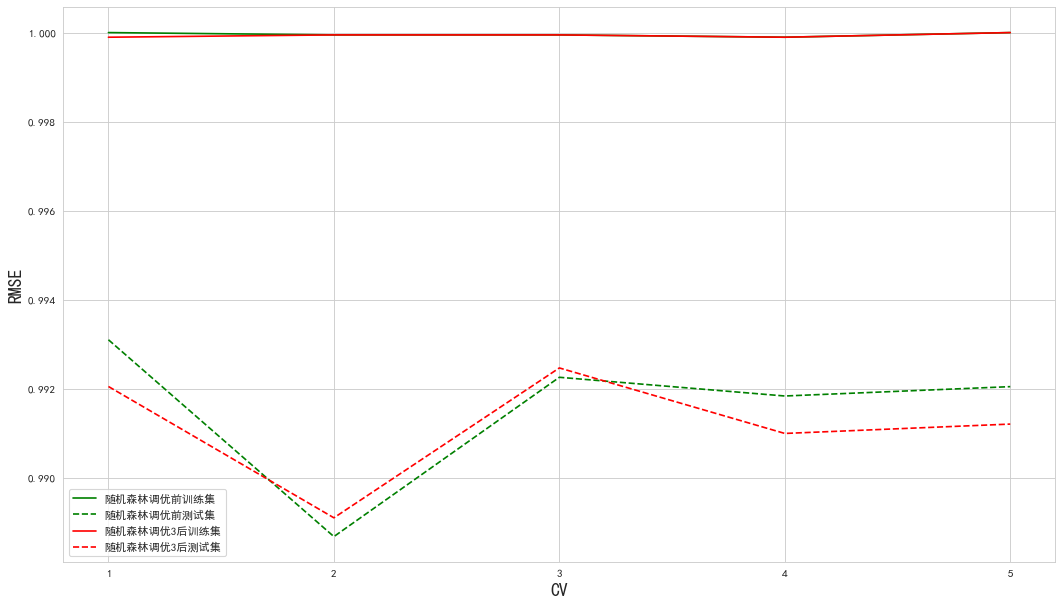

In [159]:
# 显示模型结果
plt.figure(figsize=(16,9),dpi=80)
xaxis = range(1,6)

#RMSE
plt.plot(xaxis,rfc_result['trainRMSE'],color="green",label = "随机森林调优前训练集")
plt.plot(xaxis,rfc_result['testRMSE'],color="green",linestyle="--",label = "随机森林调优前测试集")
plt.plot(xaxis,result3['trainRMSE'],color="red",label = "随机森林调优3后训练集")
plt.plot(xaxis,result3['testRMSE'],color="red",linestyle="--",label = "随机森林调优3后测试集")
plt.xticks([1,2,3,4,5])
plt.xlabel("CV",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.legend()
plt.show()


未有较大改善，进行交叉验证评分均值比较

In [160]:
# 计算均值
mean_ori_train = sum(rfc_result['trainRMSE'])/ len(rfc_result['trainRMSE'])
mean_ori_test = sum(rfc_result['testRMSE'])/ len(rfc_result['testRMSE'])
mean_turn_train1 = sum(result1['trainRMSE'])/ len(result1['trainRMSE'])
mean_turn_test1 = sum(result1['testRMSE'])/ len(result1['testRMSE'])
mean_turn_train3 = sum(result1['trainRMSE'])/ len(result1['trainRMSE'])
mean_turn_test3 = sum(result1['testRMSE'])/ len(result1['testRMSE'])

print('原随机森林训练集交叉验证分数均值{}'.format(mean_ori_train))
print('原随机森林测试集交叉验证分数均值{}'.format(mean_ori_test))
print('调优1后随机森林训练集交叉验证分数均值{}'.format(mean_turn_train1))
print('调优1后随机森林测试集交叉验证分数均值{}'.format(mean_turn_test1))
print('调优3后随机森林训练集交叉验证分数均值{}'.format(mean_turn_train3))
print('调优3后随机森林测试集交叉验证分数均值{}'.format(mean_turn_test3))

原随机森林训练集交叉验证分数均值0.9999583012990974
原随机森林测试集交叉验证分数均值0.991582010091052
调优1后随机森林训练集交叉验证分数均值0.9999374495031796
调优1后随机森林测试集交叉验证分数均值0.9911619282416183
调优3后随机森林训练集交叉验证分数均值0.9999374495031796
调优3后随机森林测试集交叉验证分数均值0.9911619282416183


选择调优1参数作为随机森林模型参数

### 模型结果查看

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建并训练模型
rfc = RandomForestClassifier(n_estimators=80, random_state=42, max_depth=21, max_features=20,min_impurity_decrease=0.0)

rfc.fit(X_train, y_train)
feature_importances = rfc.feature_importances_


In [167]:
sorted_indices = np.argsort(feature_importances)[::-1]
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                 Feature  Importance
0     satisfaction_level    0.458270
1        last_evaluation    0.151754
2         number_project    0.144957
4     time_spend_company    0.115489
3   average_montly_hours    0.114439
7                   sale    0.012715
5          Work_accident    0.002178
6  promotion_last_5years    0.000198


根据模型的特征重要性显示，员工满意度为重要性最大的特征，其次为上次绩效评估分数。重要性最低的为五年内是否晋升

依据以上结果对如何减少员工离职提出一下几点建议：
- 创建积极的工作环境：确保工作场所的物理环境舒适、安全，为员工营造一个友好和支持的工作氛围。
- 关注员工的工作与生活的平衡：提供灵活的工作时间、远程办公选项和足够的休假时间，帮助员工平衡工作与家庭生活。
- 员工关怀计划：提供心理健康支持、员工援助计划等，关注员工的心理和情感需求
- 定期的绩效反馈：不仅在年度评估时提供反馈，还应进行定期的、建设性的绩效反馈，以帮助员工不断改进。
- 设立明确的目标和期望：确保每位员工都清楚自己的角色、目标和期望，这样他们才能更有针对性地努力工作。
- 提供发展机会：根据员工的绩效表现，提供培训、晋升和职业发展的机会，使他们看到在公司的未来发展空间